# Assessment - 2

## Task2: Develop learning-based model(s) for sequence classification

### Subtask 1:

### Import Library

Step 1: Importing the necessary libraries needed.

In [163]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.layers import LSTM
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.layers import Bidirectional  
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv1D, MaxPool1D, RandomFlip, RandomRotation
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, classification_report
from numpy.random import seed
from tensorflow.random import set_seed

In [164]:
activities = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'
}

### Data Preprocessing

In [165]:
# taken from medium
def load_file(filepath):
    df = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return df.values

def load_group(files, prefix=''):
    loaded = list()
    for f in files:
        data = load_file(prefix + f)
        loaded.append(data)
    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group +'/X_'+group+ '/'
    files = list()
    # body acceleration
    files += ['acc_x_'+group+'.txt', 'acc_y_'+group+'.txt', 'acc_z_'+group+'.txt']
    # body gyroscope
    files += ['gyro_x_'+group+'.txt', 'gyro_y_'+group+'.txt', 'gyro_z_'+group+'.txt']
    X = load_group(files, filepath)
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

def load_dataset(prefix=''):
    # load all train
    X_train, y_train = load_dataset_group('train', prefix)
    # load all test
    X_test, y_test = load_dataset_group1('test', prefix)
    #zero-offset class values
    y_train = y_train - 1
    y_test = y_test - 1
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    print(f"""Dataset loaded.
Training Set:
X_train {X_train.shape} y_train {y_train.shape}
Test Set:
X_test {X_test.shape} y_test {y_test.shape}""")
    return X_train, y_train, X_test, y_test

### Splitting the Data

In [207]:
X_train, y_train, X_test, y_test = load_dataset(prefix="C:/Users/prade/Downloads/CS5062_AssessmentII_Dataset/")
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

Dataset loaded.
Training Set:
X_train (7352, 128, 6) y_train (7352, 6)
Test Set:
X_test (2947, 128, 6) y_test (2947, 6)


### CNN Model Architecture

In [208]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu',input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [209]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_50 (Conv1D)          (None, 126, 32)           608       
                                                                 
 conv1d_51 (Conv1D)          (None, 124, 64)           6208      
                                                                 
 max_pooling1d_33 (MaxPooli  (None, 62, 64)            0         
 ng1D)                                                           
                                                                 
 conv1d_52 (Conv1D)          (None, 60, 64)            12352     
                                                                 
 max_pooling1d_34 (MaxPooli  (None, 30, 64)            0         
 ng1D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 1920)            

In [210]:
es =EarlyStopping(monitor='val_loss', patience=5)
model_cnn = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2, callbacks=[es])
_, accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=2)
print('Test accuracy:', accuracy)

Epoch 1/50
184/184 - 3s - loss: 0.5201 - accuracy: 0.7786 - val_loss: 0.5773 - val_accuracy: 0.8212 - 3s/epoch - 15ms/step
Epoch 2/50
184/184 - 2s - loss: 0.2202 - accuracy: 0.9165 - val_loss: 0.4678 - val_accuracy: 0.8749 - 2s/epoch - 10ms/step
Epoch 3/50
184/184 - 2s - loss: 0.1285 - accuracy: 0.9471 - val_loss: 0.5598 - val_accuracy: 0.8987 - 2s/epoch - 10ms/step
Epoch 4/50
184/184 - 2s - loss: 0.1029 - accuracy: 0.9551 - val_loss: 0.6057 - val_accuracy: 0.8865 - 2s/epoch - 9ms/step
Epoch 5/50
184/184 - 2s - loss: 0.1000 - accuracy: 0.9548 - val_loss: 0.5907 - val_accuracy: 0.8790 - 2s/epoch - 10ms/step
Epoch 6/50
184/184 - 2s - loss: 0.0834 - accuracy: 0.9614 - val_loss: 0.6789 - val_accuracy: 0.8987 - 2s/epoch - 10ms/step
Epoch 7/50
184/184 - 2s - loss: 0.0913 - accuracy: 0.9573 - val_loss: 0.6570 - val_accuracy: 0.8967 - 2s/epoch - 10ms/step
93/93 - 0s - loss: 0.9626 - accuracy: 0.8510 - 244ms/epoch - 3ms/step
Test accuracy: 0.851034939289093


### Convergence Graph

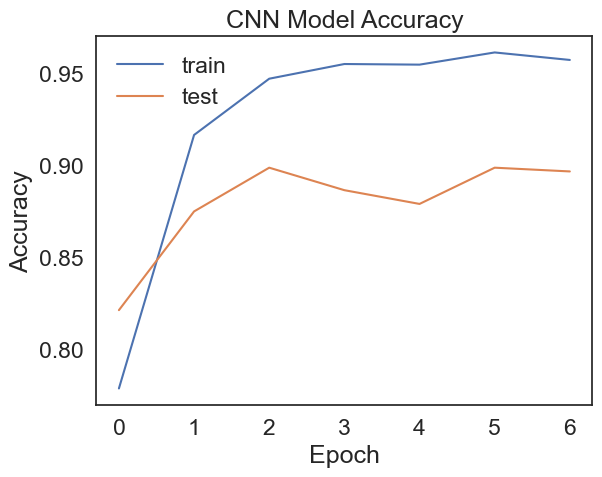

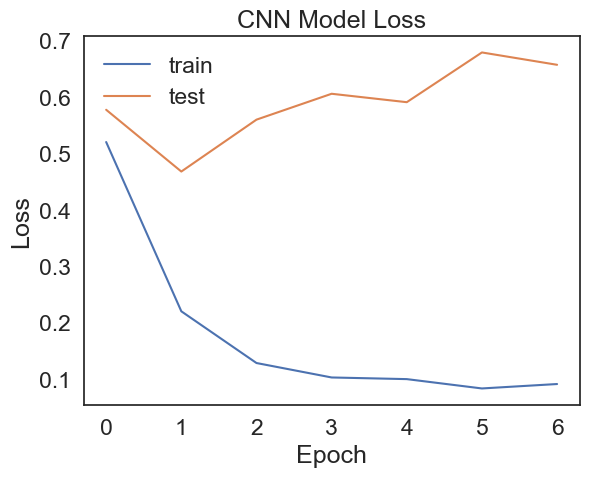

In [211]:
plt.plot(model_cnn.history['accuracy'])
plt.plot(model_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_cnn.history['loss'])
plt.plot(model_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### LSTM Model Architecture

In [198]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(n_timesteps, n_features)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(n_outputs, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [199]:
model_lstm.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                18176     
                                                                 
 dropout_45 (Dropout)        (None, 64)                0         
                                                                 
 dense_81 (Dense)            (None, 64)                4160      
                                                                 
 dense_82 (Dense)            (None, 6)                 390       
                                                                 
Total params: 22726 (88.77 KB)
Trainable params: 22726 (88.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [200]:
es =EarlyStopping(monitor='val_loss', patience=5)
model_lstm1 = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.2, callbacks=[es])
_, accuracy = model_lstm.evaluate(X_test, y_test, batch_size=32, verbose=2)
print('Test accuracy:', accuracy)

Epoch 1/10
184/184 - 9s - loss: 1.3350 - accuracy: 0.4149 - val_loss: 1.1678 - val_accuracy: 0.5017 - 9s/epoch - 51ms/step
Epoch 2/10
184/184 - 6s - loss: 1.0120 - accuracy: 0.5661 - val_loss: 0.9447 - val_accuracy: 0.5996 - 6s/epoch - 34ms/step
Epoch 3/10
184/184 - 6s - loss: 0.7934 - accuracy: 0.6407 - val_loss: 0.8742 - val_accuracy: 0.6254 - 6s/epoch - 35ms/step
Epoch 4/10
184/184 - 6s - loss: 0.6210 - accuracy: 0.7109 - val_loss: 0.7639 - val_accuracy: 0.7492 - 6s/epoch - 34ms/step
Epoch 5/10
184/184 - 6s - loss: 0.5590 - accuracy: 0.7621 - val_loss: 0.7585 - val_accuracy: 0.8049 - 6s/epoch - 35ms/step
Epoch 6/10
184/184 - 6s - loss: 0.4606 - accuracy: 0.8303 - val_loss: 0.6352 - val_accuracy: 0.8328 - 6s/epoch - 35ms/step
Epoch 7/10
184/184 - 6s - loss: 0.3940 - accuracy: 0.8621 - val_loss: 0.5260 - val_accuracy: 0.8600 - 6s/epoch - 34ms/step
Epoch 8/10
184/184 - 6s - loss: 0.2799 - accuracy: 0.9078 - val_loss: 0.4422 - val_accuracy: 0.8844 - 6s/epoch - 35ms/step
Epoch 9/10
184/1

### Convergence Graph

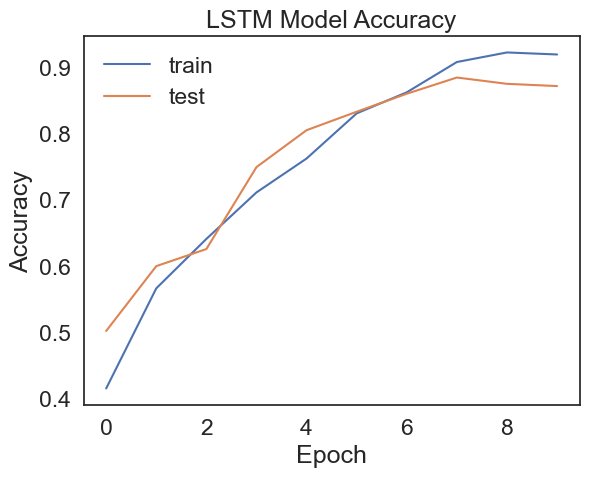

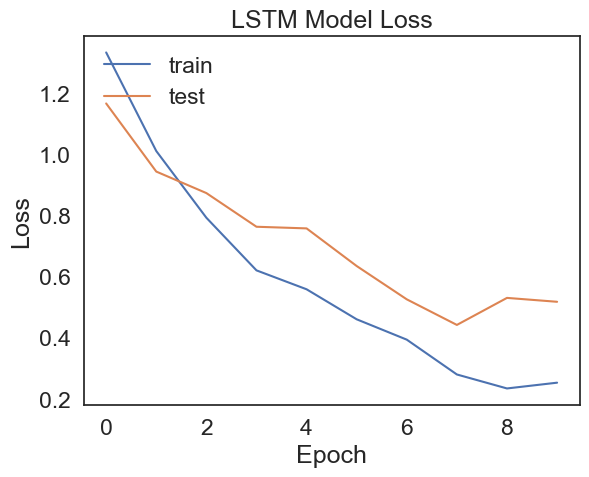

In [201]:
plt.plot(model_lstm1.history['accuracy'])
plt.plot(model_lstm1.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_lstm1.history['loss'])
plt.plot(model_lstm1.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### BiRNN Model Architecture

In [175]:
model_birnn = Sequential() 
model_birnn.add(Bidirectional(LSTM(64), input_shape=(n_timesteps, n_features))) 
model_birnn.add(Dropout(0.5))
model_birnn.add(Dense(100, activation='relu')) 
model_birnn.add(Dense(n_outputs, activation='softmax')) 
model_birnn.compile('adam', 'categorical_crossentropy', metrics=['accuracy']) 

In [176]:
model_birnn.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirecti  (None, 128)               36352     
 onal)                                                           
                                                                 
 dropout_43 (Dropout)        (None, 128)               0         
                                                                 
 dense_73 (Dense)            (None, 100)               12900     
                                                                 
 dense_74 (Dense)            (None, 6)                 606       
                                                                 
Total params: 49858 (194.76 KB)
Trainable params: 49858 (194.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [177]:
es =EarlyStopping(monitor='val_loss', patience=5)
model_birnn1 = model_birnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.2, callbacks=[es])
_, accuracy = model_birnn1.evaluate(X_test, y_test, batch_size=32, verbose=2)
print('Test accuracy:', accuracy)

Epoch 1/10
184/184 - 10s - loss: 1.0167 - accuracy: 0.5688 - val_loss: 0.8520 - val_accuracy: 0.6778 - 10s/epoch - 56ms/step
Epoch 2/10
184/184 - 7s - loss: 0.6274 - accuracy: 0.7371 - val_loss: 0.7361 - val_accuracy: 0.7627 - 7s/epoch - 39ms/step
Epoch 3/10
184/184 - 7s - loss: 0.4938 - accuracy: 0.8119 - val_loss: 0.7090 - val_accuracy: 0.8158 - 7s/epoch - 39ms/step
Epoch 4/10
184/184 - 7s - loss: 0.4085 - accuracy: 0.8543 - val_loss: 0.7349 - val_accuracy: 0.8450 - 7s/epoch - 39ms/step
Epoch 5/10
184/184 - 7s - loss: 0.3443 - accuracy: 0.8820 - val_loss: 0.6196 - val_accuracy: 0.8491 - 7s/epoch - 39ms/step
Epoch 6/10
184/184 - 7s - loss: 0.2948 - accuracy: 0.8973 - val_loss: 0.4564 - val_accuracy: 0.8634 - 7s/epoch - 39ms/step
Epoch 7/10
184/184 - 7s - loss: 0.2207 - accuracy: 0.9216 - val_loss: 0.4656 - val_accuracy: 0.8763 - 7s/epoch - 39ms/step
Epoch 8/10
184/184 - 7s - loss: 0.2298 - accuracy: 0.9160 - val_loss: 0.5927 - val_accuracy: 0.8878 - 7s/epoch - 39ms/step
Epoch 9/10
184

### Convergence Graph

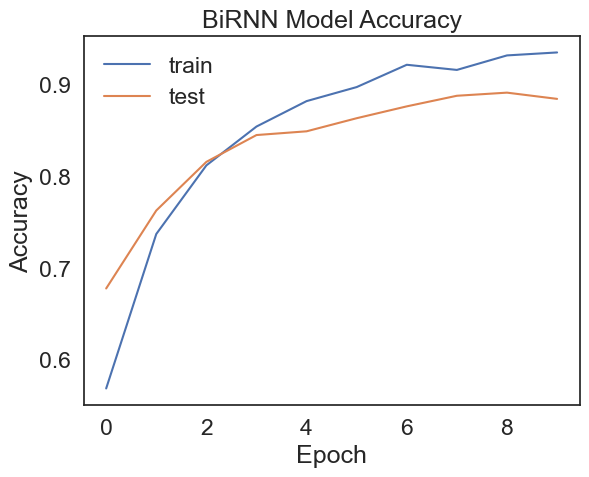

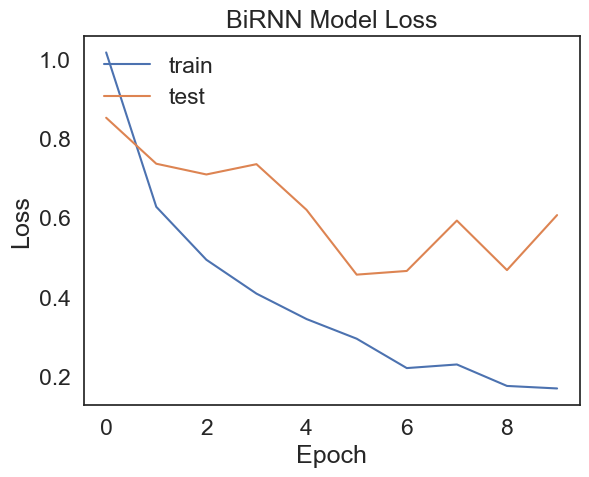

In [178]:
plt.plot(model_birnn1.history['accuracy'])
plt.plot(model_birnn1.history['val_accuracy'])
plt.title('BiRNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_birnn1.history['loss'])
plt.plot(model_birnn1.history['val_loss'])
plt.title('BiRNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Performance Report of the Models

### Evaluating the Models

In [223]:
#CNN
scores = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print("Test Loss: %f" % (scores[0]))

Test Accuracy: 85.103494%
Test Loss: 0.962565


In [224]:
#LSTM
scores = model_lstm.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print("Test Loss: %f" % (scores[0]))

Test Accuracy: 84.662366%
Test Loss: 0.541332


In [225]:
#Bi-RNN
scores = model_birnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print("Test Loss: %f" % (scores[0]))

Test Accuracy: 86.528671%
Test Loss: 0.465798


### Confusion Matrix of CNN

93/93 [==============================] - 0s 3ms/step


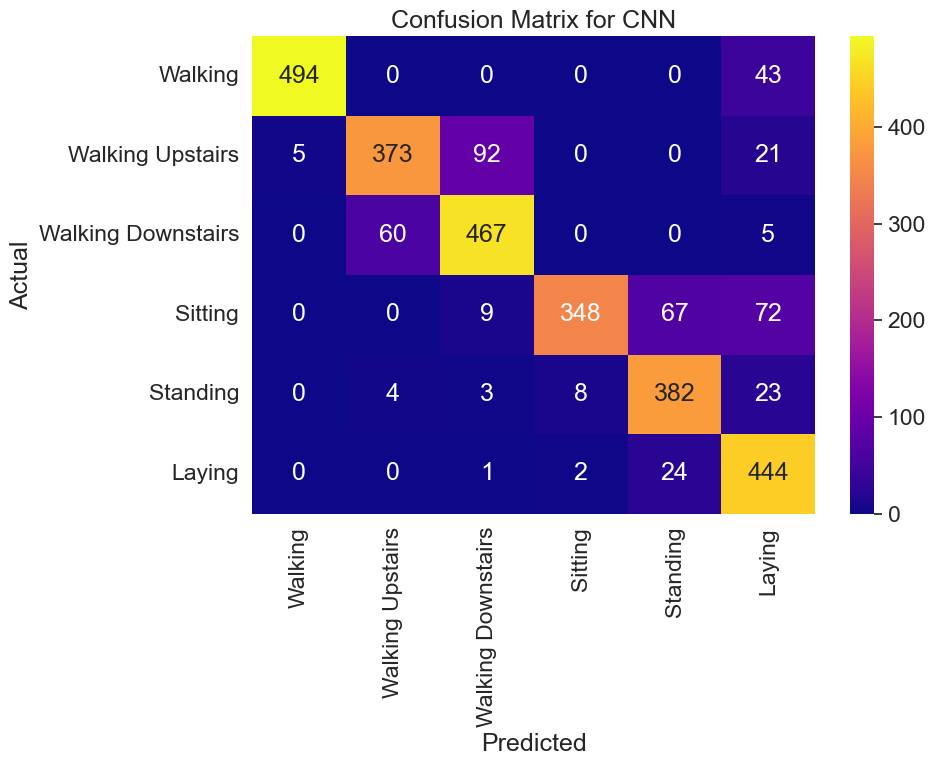

In [217]:
y_pred = model.predict(X_test)
y_predict = [activities[i + 1] for i in np.argmax(y_pred, axis=1)]
y_actual = [activities[i + 1] for i in np.argmax(y_test, axis=1)]
class_names = list(activities.values())
confusion = confusion_matrix(y_actual, y_predict)

plt.figure(figsize=(10,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='plasma', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix for CNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Confusion Matrix of LSTM

93/93 [==============================] - 1s 12ms/step


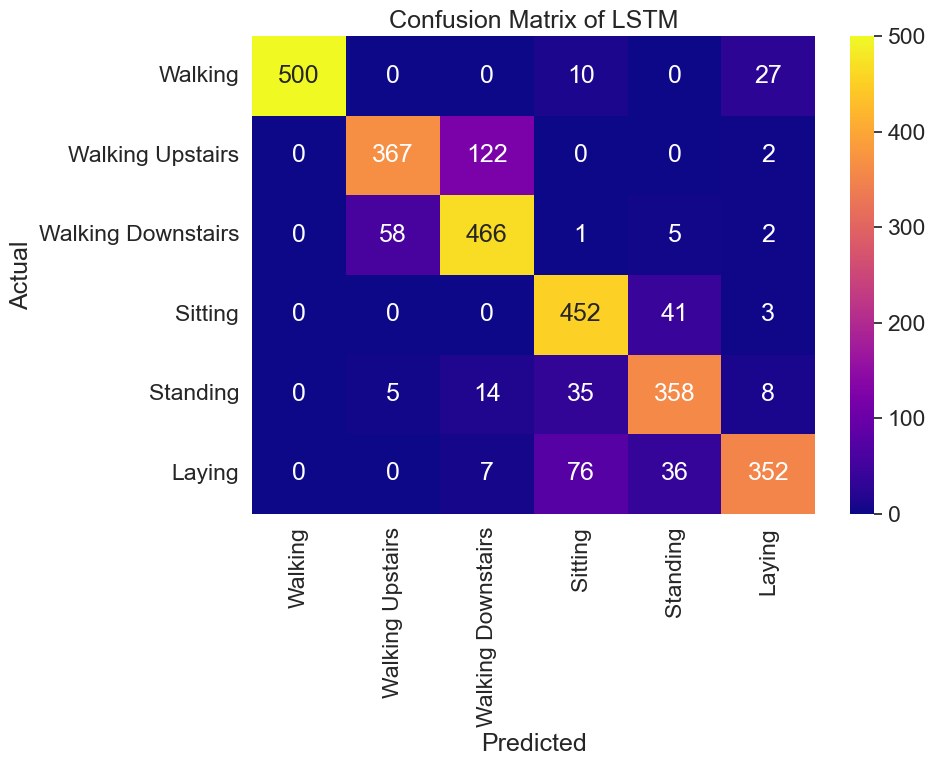

In [218]:
y_pred1 = model_lstm.predict(X_test)
y_predict1 = [activities[i + 1] for i in np.argmax(y_pred1, axis=1)]
y_actual = [activities[i + 1] for i in np.argmax(y_test, axis=1)]
class_names = list(activities.values())
confusion = confusion_matrix(y_actual, y_predict1)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='plasma', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix of LSTM")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Confusion Matrix of Bi-RNN

93/93 [==============================] - 1s 12ms/step


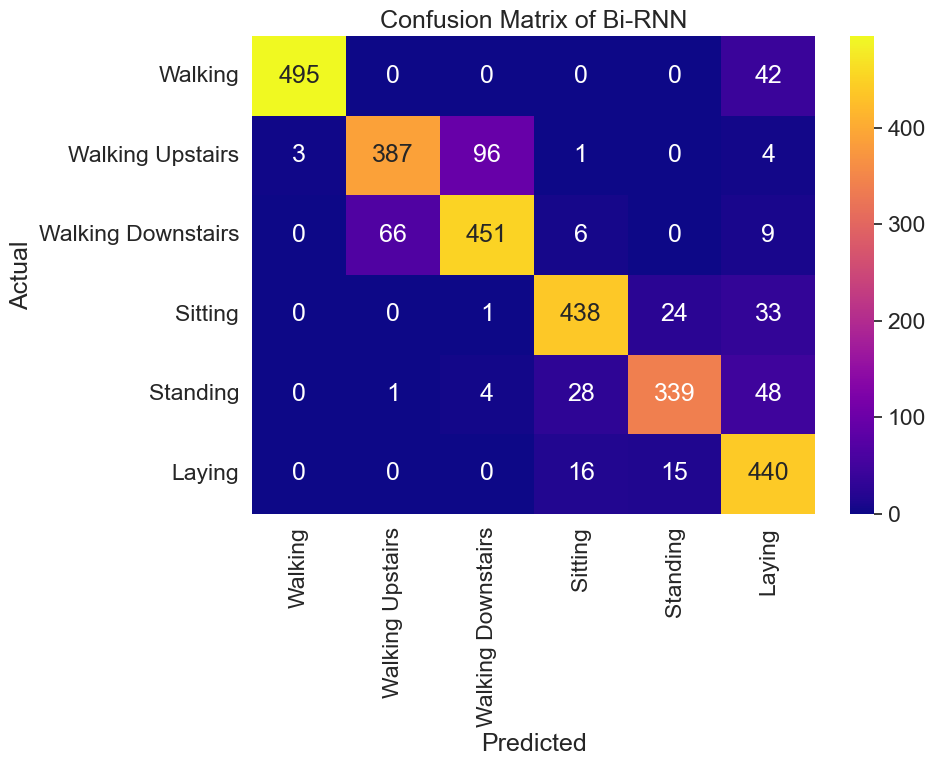

In [219]:
y_pred2 = model_birnn.predict(X_test)
y_predict2 = [activities[i + 1] for i in np.argmax(y_pred2, axis=1)]
y_actual = [activities[i + 1] for i in np.argmax(y_test, axis=1)]
class_names = list(activities.values())
confusion = confusion_matrix(y_actual, y_predict2)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='plasma', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix of Bi-RNN")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### Classification Report for CNN

In [220]:
auroc = roc_auc_score(y_test, y_pred)
print(classification_report(y_actual, y_predict, target_names=activities.values(), digits=4)) 
print(f"Area Under the ROC Curve (AUROC): {auroc:.4f}")

                    precision    recall  f1-score   support

           Walking     0.9900    0.9199    0.9537       537
  Walking Upstairs     0.8535    0.7597    0.8039       491
Walking Downstairs     0.8164    0.8778    0.8460       532
           Sitting     0.9721    0.7016    0.8150       496
          Standing     0.8076    0.9095    0.8555       420
            Laying     0.7303    0.9427    0.8230       471

          accuracy                         0.8510      2947
         macro avg     0.8617    0.8519    0.8495      2947
      weighted avg     0.8654    0.8510    0.8511      2947

Area Under the ROC Curve (AUROC): 0.9724


### Classification Report for LSTM

In [221]:
auroc = roc_auc_score(y_test, y_pred1)
print(classification_report(y_actual, y_predict1, target_names=activities.values(), digits=4)) 
print(f"Area Under the ROC Curve (AUROC): {auroc:.4f}")

                    precision    recall  f1-score   support

           Walking     1.0000    0.9311    0.9643       537
  Walking Upstairs     0.8535    0.7475    0.7970       491
Walking Downstairs     0.7652    0.8759    0.8168       532
           Sitting     0.7875    0.9113    0.8449       496
          Standing     0.8136    0.8524    0.8326       420
            Laying     0.8934    0.7473    0.8139       471

          accuracy                         0.8466      2947
         macro avg     0.8522    0.8443    0.8449      2947
      weighted avg     0.8538    0.8466    0.8469      2947

Area Under the ROC Curve (AUROC): 0.9724


### Classification Report for BiRNN

In [222]:
auroc = roc_auc_score(y_test, y_pred2)
print(classification_report(y_actual, y_predict2, target_names=activities.values(), digits=4)) 
print(f"Area Under the ROC Curve (AUROC): {auroc:.4f}")

                    precision    recall  f1-score   support

           Walking     0.9940    0.9218    0.9565       537
  Walking Upstairs     0.8524    0.7882    0.8190       491
Walking Downstairs     0.8170    0.8477    0.8321       532
           Sitting     0.8957    0.8831    0.8893       496
          Standing     0.8968    0.8071    0.8496       420
            Laying     0.7639    0.9342    0.8405       471

          accuracy                         0.8653      2947
         macro avg     0.8700    0.8637    0.8645      2947
      weighted avg     0.8713    0.8653    0.8661      2947

Area Under the ROC Curve (AUROC): 0.9835
